# **Project Title: Risk Assessment for the Establishment and Operations Of a Movie Studio**

# ****Author: GROUP 8****

## **Step 1: Business Understanding** 
The company aims to diversify its operations by venturing into the competitive film production industry by creating original video content. However, due to lack of experience in movie production, they require data-driven insights to identify successful movie trends at the box office in the current market.

### ****Challenges****
The company lacks experience in the film industry, has uncertainity about the necessities of the industry like best genre, producer and production strategies that resonate with the audience and has no information on the financial risk associated with film idustry that it may face

### ****Proposed Solution****
Analyze historical box office data to identify information and patterns like genres, budgets, release timing, franchises in successful films. Then provide actionable recommendations to guide the company on the things to prioritize and the studio content strategy to adopt.

### ****Conclusion****
By leveraging data analysis, the company can identify successful and failure patterns inorder to adopt the right strategy, mitigate risks and align its film production with market demand.

### ****Problem Statement****
The company aims to establish a new movie studio to capitalize on the growing demand for original video content. However, due to lack of experience in the film industry, uncertainty over the type of production to venture into and lack of info on the finacial risk, the studio faces significant challenges in determining which types of movies are most likely to succeed.

### ****Objectives****
1. To analyze historical box office data to identify trends in successful films
2. To determine the relationship between production budget and revenue
3. To compare audience and critic ratings
4. To provide actionable recommendations on best film production strategies


## **Step 2: Data Undertanding**

### ****Data Source****
The folder zippedData contains historical box office data scrapped from https://www.boxofficemojo.com/, https://www.imdb.com/, https://www.rottentomatoes.com/, https://www.themoviedb.org/, https://www.the-numbers.com/ that will be used for this analysis, detailing all relevant information about film industry, including the movie genres, their budget, revenue, producers, release date and reviews.

### **column description**
1. genres

   Type: Categorical

   Description: The primary category/categories of the film (e.g., Action, Comedy, Drama, Animation).

2. production_budget

   Type: Numerical

   Description: Total production cost of the film in USD.

3. domestic_gross/worldwide_gross

   Type: Numerical

   Description: Total box office earnings in USD.

4. release_date	

   Type: Categorical

   Description: Month the film was released

5. runtime_minutes

   Type: Numerical

   Description: Duration of the film in minutes.

6. averagerating
   
   Type: Numerical
   
   Description: Audience or critic aggregate score


In [4]:
# import relevant libraries
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile
import tempfile
import os

In [5]:
# loading the datasets
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='latin1')
movie_DB = pd.read_csv("zippedData/tmdb.movies.csv.gz")
numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

# Extract the .db file from the ZIP
# with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
#     # Extract to subfolder
#     zip_ref.extract("im.db", path="zippedData/extracted")  

# Extract the .db file from the ZIP
with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
    with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
        tmp_file.write(zip_ref.read("im.db"))

# # Connect to the extracted database
conn = sqlite3.connect(tmp_file.name)  # Path to extracted file

# Run your query
q = """
SELECT *
FROM movie_basics
JOIN movie_ratings USING (movie_id)
"""
imdb = pd.read_sql(q, conn)

# Close connection
conn.close()

In [6]:
# Display the first 5 rows
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# get info summary of the dataset
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Box office mojo dataset has 3387 rows. From this, it can be seen that the columns studio, domestic_gross and foreign_gross have missing values.

In [8]:
# Display the first 5 rows
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [9]:
# get info summary of the dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


From the movie_basics and movie_ratings tables form IMDB sqlite file extracted, the final joined contains 73856 rows. It can be seen that columns runtime_minutes and genres contains missing values

In [10]:
# Display the first 5 rows
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# get info summary of the dataset
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the numbers table, it can be seen that the table has 5782 and the columns have no missing values

## Step 3: Data Preparations
### data cleaning


In [12]:
# checking for duplicates
bom.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [13]:
imdb.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [14]:
numbers.duplicated().value_counts()

False    5782
Name: count, dtype: int64

From the above analysis we can see that the tables have no duplicated values

In [15]:
# check missing values for BOM table
bom.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
# replace missing values with placeholders
for col in bom.columns:
    if str(bom[col].dtype) == "object":
        bom[col].fillna("Unknown", inplace=True)
    else:
        bom[col].fillna(0, inplace=True)

bom.isna().sum()

C:\Users\oguda\AppData\Local\Temp\ipykernel_85152\3345483797.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom[col].fillna("Unknown", inplace=True)
C:\Users\oguda\AppData\Local\Temp\ipykernel_85152\3345483797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
# check missing values of imdb
imdb.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [18]:
for col in imdb.columns:
    if str(imdb[col].dtype) == "object":
        imdb[col].fillna("Unknown", inplace=True)
    else:
        imdb[col].fillna(0, inplace=True)

imdb.isna().sum()

C:\Users\oguda\AppData\Local\Temp\ipykernel_85152\1493801059.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb[col].fillna("Unknown", inplace=True)
C:\Users\oguda\AppData\Local\Temp\ipykernel_85152\1493801059.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

The above codes replaces the missing values with place holders, unknown for categorical and  zero for numerical columns. The reason for this is to maintain the original completness of the dataset without dropping valuable records.

In [19]:
# convert release_date to datetime
numbers["release_date"] = pd.to_datetime(numbers["release_date"])
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
# standardized column names for common columns
imdb = imdb.rename(columns={"primary_title":"title"})
numbers = numbers.rename(columns={"movie":"title"})

In [21]:
# merge all the dataframes
merge1 = pd.merge(imdb, numbers, on='title', how='inner')
merge_df = pd.merge(merge1,bom, on='title', how='inner')


In [22]:
# crate a list of columns to drop
columns = ["original_title", "start_year", "id", "domestic_gross_y", "foreign_gross"]
# pass the list in the .drop method to drop the columns
merge_df = merge_df.drop(columns=columns)



In [23]:
# create a standardized column names
merge_df = merge_df.rename(columns={'domestic_gross_x':'domestic_gross'})
merge_df = merge_df.rename(columns={'averagerating':'average_rating'})
merge_df = merge_df.rename(columns={'numvotes':'num_votes'})

In [24]:
# create a function that converts object to integer
def converter(df,column_name):
    # Remove $ and , before converting
    df[column_name]=df[column_name].replace("[\\$,]","",regex=True).astype(int)
    return 

# create a list of columns to convert 
column = ["domestic_gross","worldwide_gross","production_budget"]
converter(merge_df,column)


In [25]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1413 non-null   object        
 1   title              1413 non-null   object        
 2   runtime_minutes    1413 non-null   float64       
 3   genres             1413 non-null   object        
 4   average_rating     1413 non-null   float64       
 5   num_votes          1413 non-null   int64         
 6   release_date       1413 non-null   datetime64[ns]
 7   production_budget  1413 non-null   int32         
 8   domestic_gross     1413 non-null   int32         
 9   worldwide_gross    1413 non-null   int32         
 10  studio             1413 non-null   object        
 11  year               1413 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 116.0+ KB


## Data analysis

In [26]:
# mean domestic gross over the years 
mean_domestic_gross= (merge_df.groupby("year")["domestic_gross"]
                      .agg(["count","mean"])
                      .sort_values("mean", ascending=False))
mean_domestic_gross

,count,mean
year,,
2018,111,8.057689e+07
2017,132,7.090809e+07
2013,149,6.877229e+07
2015,180,5.999189e+07
2014,155,5.882099e+07
2016,166,5.842007e+07
2012,149,5.699038e+07
2010,179,5.205774e+07
2011,192,4.675607e+07


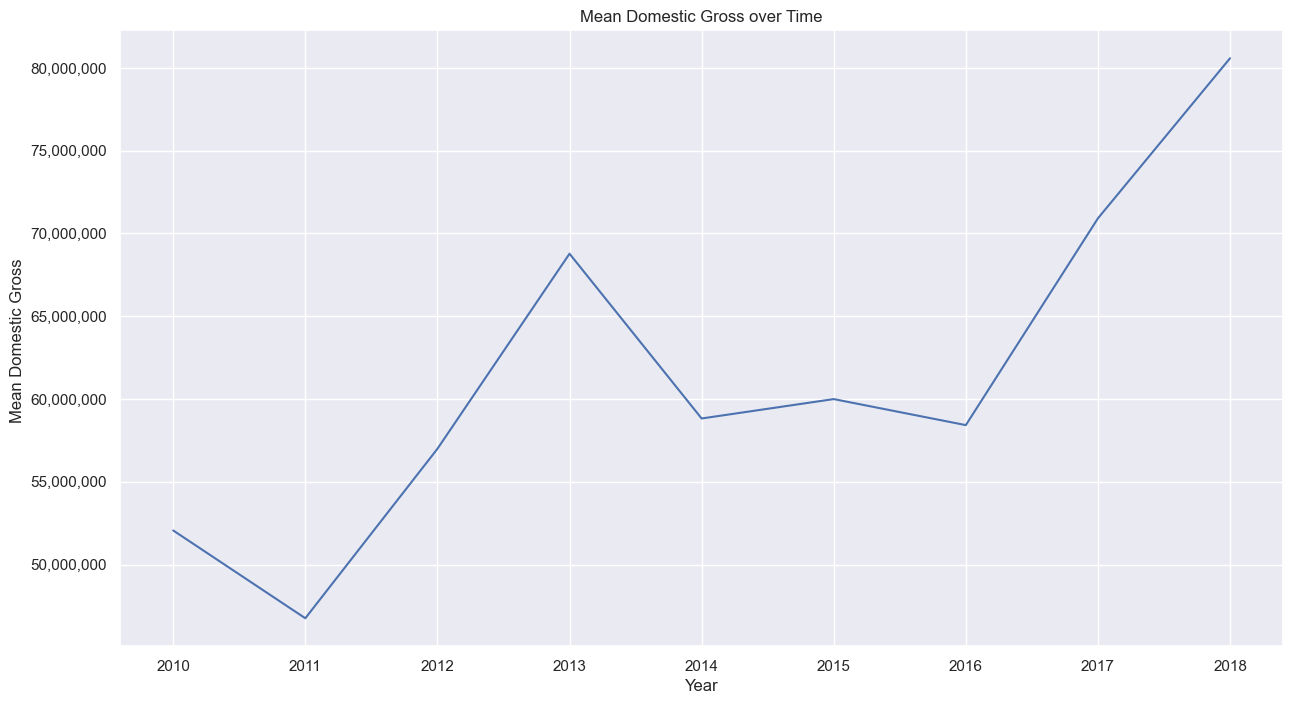

In [27]:
# plot year vs mean domestic gross
import matplotlib.ticker as ticker

# set the style and size of the plot
sns.set_style("darkgrid")
sns.set_theme(rc={"figure.figsize":(15,8)})

# Plot mean domestic gross over the years
sns.lineplot(data= mean_domestic_gross,
             x="year",
             y="mean",
             errorbar=None
)
# Format the y-axis to include commas and dollar signs
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Add titles and labels
plt.title("Mean Domestic Gross over Time")
plt.xlabel("Year")
plt.ylabel("Mean Domestic Gross ")

# Show the plot
plt.show()




From this illustration,it is evident that there was a decline in mean domestic gross from 2010 to 2011,then a steady rise to 2013.It plateaued for a year then steadily dropped for 2years upto 2016.It then peaked upto 2018. In conclusion,its evident that domestically,the mean gross revenue ranges between 40M $ to 80M $

In [28]:
# mean worldwide gross over the years
mean_worldwide_gross=(merge_df.groupby("year")["worldwide_gross"]
                      .agg(["count","mean"])
                      .sort_values("mean", ascending=False))
mean_worldwide_gross

,count,mean
year,,
2018,111,1.954214e+08
2017,132,1.917472e+08
2013,149,1.749376e+08
2015,180,1.495704e+08
2014,155,1.489189e+08
2016,166,1.477160e+08
2012,149,1.424902e+08
2010,179,1.184780e+08
2011,192,1.166909e+08


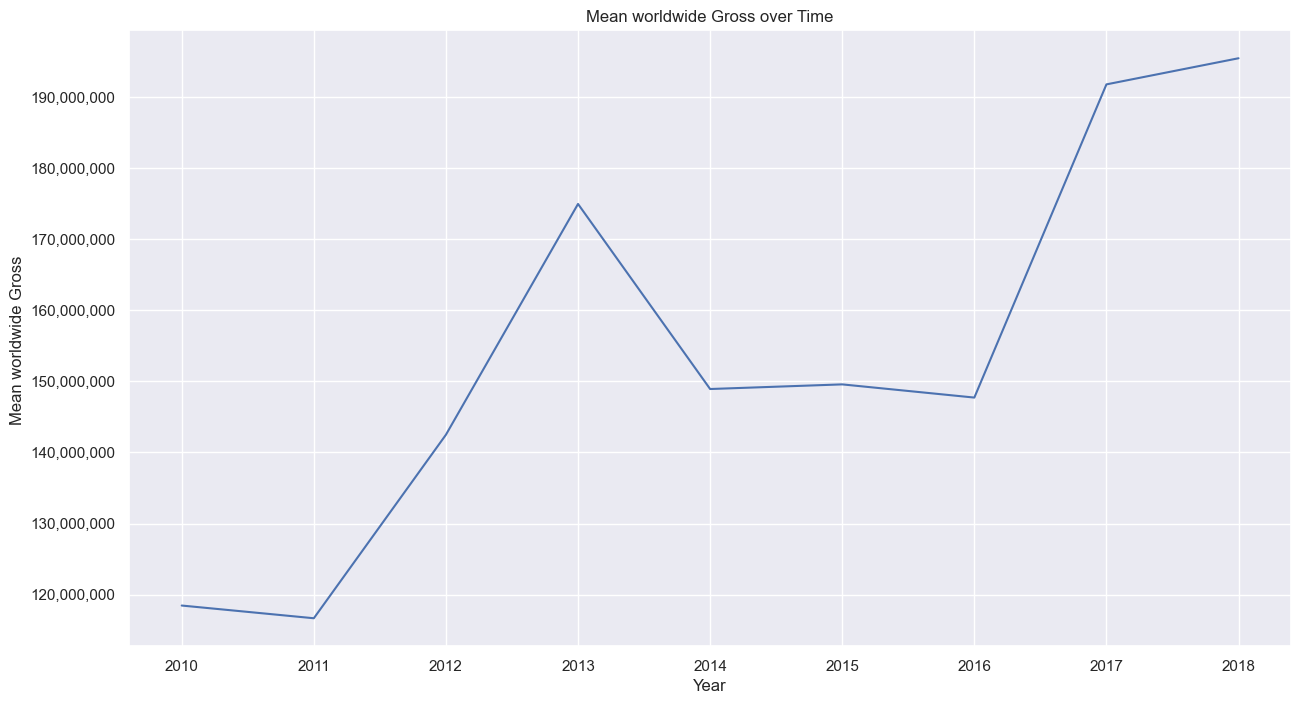

In [29]:
# set the style and size of the plot
sns.set_style("darkgrid")
sns.set_theme(rc={"figure.figsize":(15,8)})

# Plot mean domestic gross over the years
sns.lineplot(data= mean_worldwide_gross,
             x="year",
             y="mean",
             errorbar=None
)
# Format the y-axis to include commas and dollar signs
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Add titles and labels
plt.title("Mean worldwide Gross over Time")
plt.xlabel("Year")
plt.ylabel("Mean worldwide Gross ")

# Show the plot
plt.show()




From the above illustration,It is evident that  mean worlwide gross revenue plateaued for a year, then steadily rose up to 2013,dropped for a year, plateaued for another 2years then steadily peaked.In conclusion, The mean worldwide gross ranges between 100M $ upto 200M $

In [30]:

top5_genres_yearly=(merge_df.groupby(["year","genres"])["worldwide_gross"]
                      .agg(["count","mean"])
                      .sort_values(['year', "mean"], ascending=[True, False]))
top5_genres_worldwide= top5_genres_yearly.groupby("year").head(2)



In [31]:
top5_genres_yearly2= (merge_df.groupby(["year","genres"])["domestic_gross"]
                      .agg(["count","mean"])
                      .sort_values(['year', "mean"], ascending=[True, False]))
top5_genres_domestic= top5_genres_yearly2.groupby("year").head(2)
top5_genres_domestic


count          mean
year genres                                            
2010 Adventure,Drama,Fantasy            1  3.005318e+08
     Animation,Comedy,Family            1  2.515140e+08
2011 Comedy,Mystery                     1  2.544643e+08
     Action,Adventure,Sci-Fi            4  1.980136e+08
2012 Adventure,Family,Fantasy           1  3.030036e+08
     Comedy,Fantasy                     1  2.186657e+08
2013 Adventure,Drama,Sport              1  4.007380e+08
     Fantasy,Romance                    1  4.007380e+08
2014 Action,Biography,Drama             1  3.501264e+08
     Action,Adventure,Comedy            1  3.331721e+08
2015 Biography,Documentary,History      1  3.564617e+08
     Family                             1  3.564617e+08
2016 Animation,Comedy,Family            1  2.703290e+08
     Action,Adventure,Sci-Fi            6  2.278248e+08
2017 Documentary,Drama,Sport            1  4.125634e+08
     Sci-Fi                             1  4.125634e+08
2018 Action,Adventure,Sci-Fi            6  3.515528e+08
     Action,Adventure,Animation         2  3.045364e+08